In [1]:
import sys; sys.path.append("..")

import pandas as pd

import janitor.register as register
from janitor.functions import *
import janitor.pyjpipe as pyjpipe


/home/asmirnov/projects/pyjviz-poc/notebooks/../janitor/register.py:67: UserWarning: registration of accessor <class 'janitor.register.register_dataframe_method.<locals>.inner.<locals>.AccessorMethod'> under name 'drop' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  register_dataframe_accessor(method.__name__)(AccessorMethod)


In [13]:
register.setup_pyjrdf_output("./test-rdf.ttl")

df1 = pd.DataFrame({'id': [1,1,1,2,2,3], 'value_1': [2,5,7,1,3,4]})

df2 = pd.DataFrame({'id': [1,1,1,1,2,2,2,3],
                        'value_2A': [0,3,7,12,0,2,3,1],
                        'value_2B': [1,5,9,15,1,4,6,3]})


if 0:
    res1 = pyjpipe.pipe("p1",
                            lambda: df1.conditional_join(df2,
                                                         ('id', 'id', "<"),
                                                         df_columns = {'id':'df_id'},
                                                         right_columns = {'id':'right_id'}
                                                         ))
    print(res1)

if 1:
    res2 = pyjpipe.pipe("p2",
                            lambda: df1.select_columns('value_1').conditional_join(
                                df2.select_columns('val*'),
                                ('value_1', 'value_2A', '>'),
                            ('value_1', 'value_2B', '<')).drop('value_1', axis = 1)
                            )
    print(res2)


pipe start: p2


TypeError: drop() got an unexpected keyword argument 'axis'

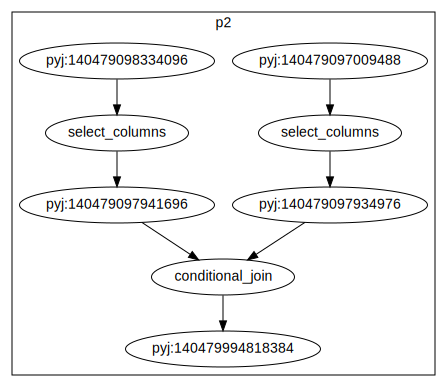

In [10]:
import graphviz 
from IPython.display import display
import rdflib
import janitor.pyjviz as pyjviz

pyjlog_ttl_fn = "./test-rdf.ttl"
g = rdflib.Graph()
g.parse(pyjlog_ttl_fn)
dot_code = pyjviz.dump_dot_code(g)

source= dot_code
gvz=graphviz.Source(source)
# produce PDF
#gvz.view()
#print (gvz.source)
display(gvz)